In [4]:
package example {
    import ScalarValues::*;
    import SI::*;
    
    doc /* LLM Integration example: 
    Here we create a block 
    1. with dimenstions (length, width, and height) and Volume.
    2. We create and define the calculation for the volume.
    3. We define the blocks part usage of m_volume to be the returned calculated volume.
    
    To integrate with an LLM lets perform the following steps:
    A. Create an exmaple Scilab API
    B. Create a Analysis Template which describes how to use the API
    C. Build a LLM Assitant and ask the assistance to reutrn code to perform the analysis using the models and the API. 
    */
    
    attribute def Length;
    attribute def Width;
    attribute def Height;
    attribute def Volume;
    
    // Definition of a block
    part def Block {
        attribute length: Length:Real;
        attribute width: Width:Real;
        attribute height: Height:Real;
        attribute volume: Volume:Real;
        
        // Calulcation definition is containted by the block definition
        calc def CalculatedBlockVolume { 
            in l: Length; 
            in w: Width; 
            in h: Height;
            return : Volume = (l * w * h);
            }
        }
    
    // Usage of a block
    part block_1: Block {
        i_length::> length = 2[m];
        i_width::> width = 2[m];
        i_height::> height = 2[m];
        c_volume =  0; // Returned calculated volume from analysis template
        m_volume::> volume = calculatedBlock_1Volume.volume; // Modeled Volume
        
        calc calculatedBlock_1Volume: CalculatedBlockVolume {
                in l = i_length;
                in w = i_width;
                in h = i_height;
                return volume;
            }
            
        }
    
    requirement def MaximumVolumnRequirement {
        doc /* The maximum volume allowable */
        
        attribute volumeCalculated: Volume;
        attribute volumeRequired: Volume;
        require constraint {volumeCalculated <= volumeRequired}
    }
    
    requirement def MaximumLengthRequirement {
        doc /* The maximum length allowable */
        
        attribute lengthCalculated: Length;
        attribute lengthRequired: Length;
        require constraint {lengthCalculated <= lengthRequired}
    }
    
    requirement <'1'> maxBlockVolume : MaximumVolumnRequirement {
        subject block_1: Block;
        attribute :>> volumeRequired = 5.5[m^3];
        require constraint requiredMaximumVolume { volumeCalculated <= volumeRequired }
        }
        
    requirement <'2'> maxBlockLength : MaximumLengthRequirement {
        subject block_1: Block;
        attribute :>> lengthRequired = 2.08[m];
        require constraint requiredMaximumLength { block_1.length <= lengthRequired }
        }
    
    comment about block_1 /* How do we manage the modeled and calculated (or measured) volume results?
        - Save results back to the model 'c_volume'?
        - Save results and metadata to a central db?
        ___- Need Numbering Scehma and FQNs. 
        - No save and rerun calcs for tabluarization?
    */
}

Package example (6ee9dc92-5807-4981-bffd-c1cc1cf0d1d7)


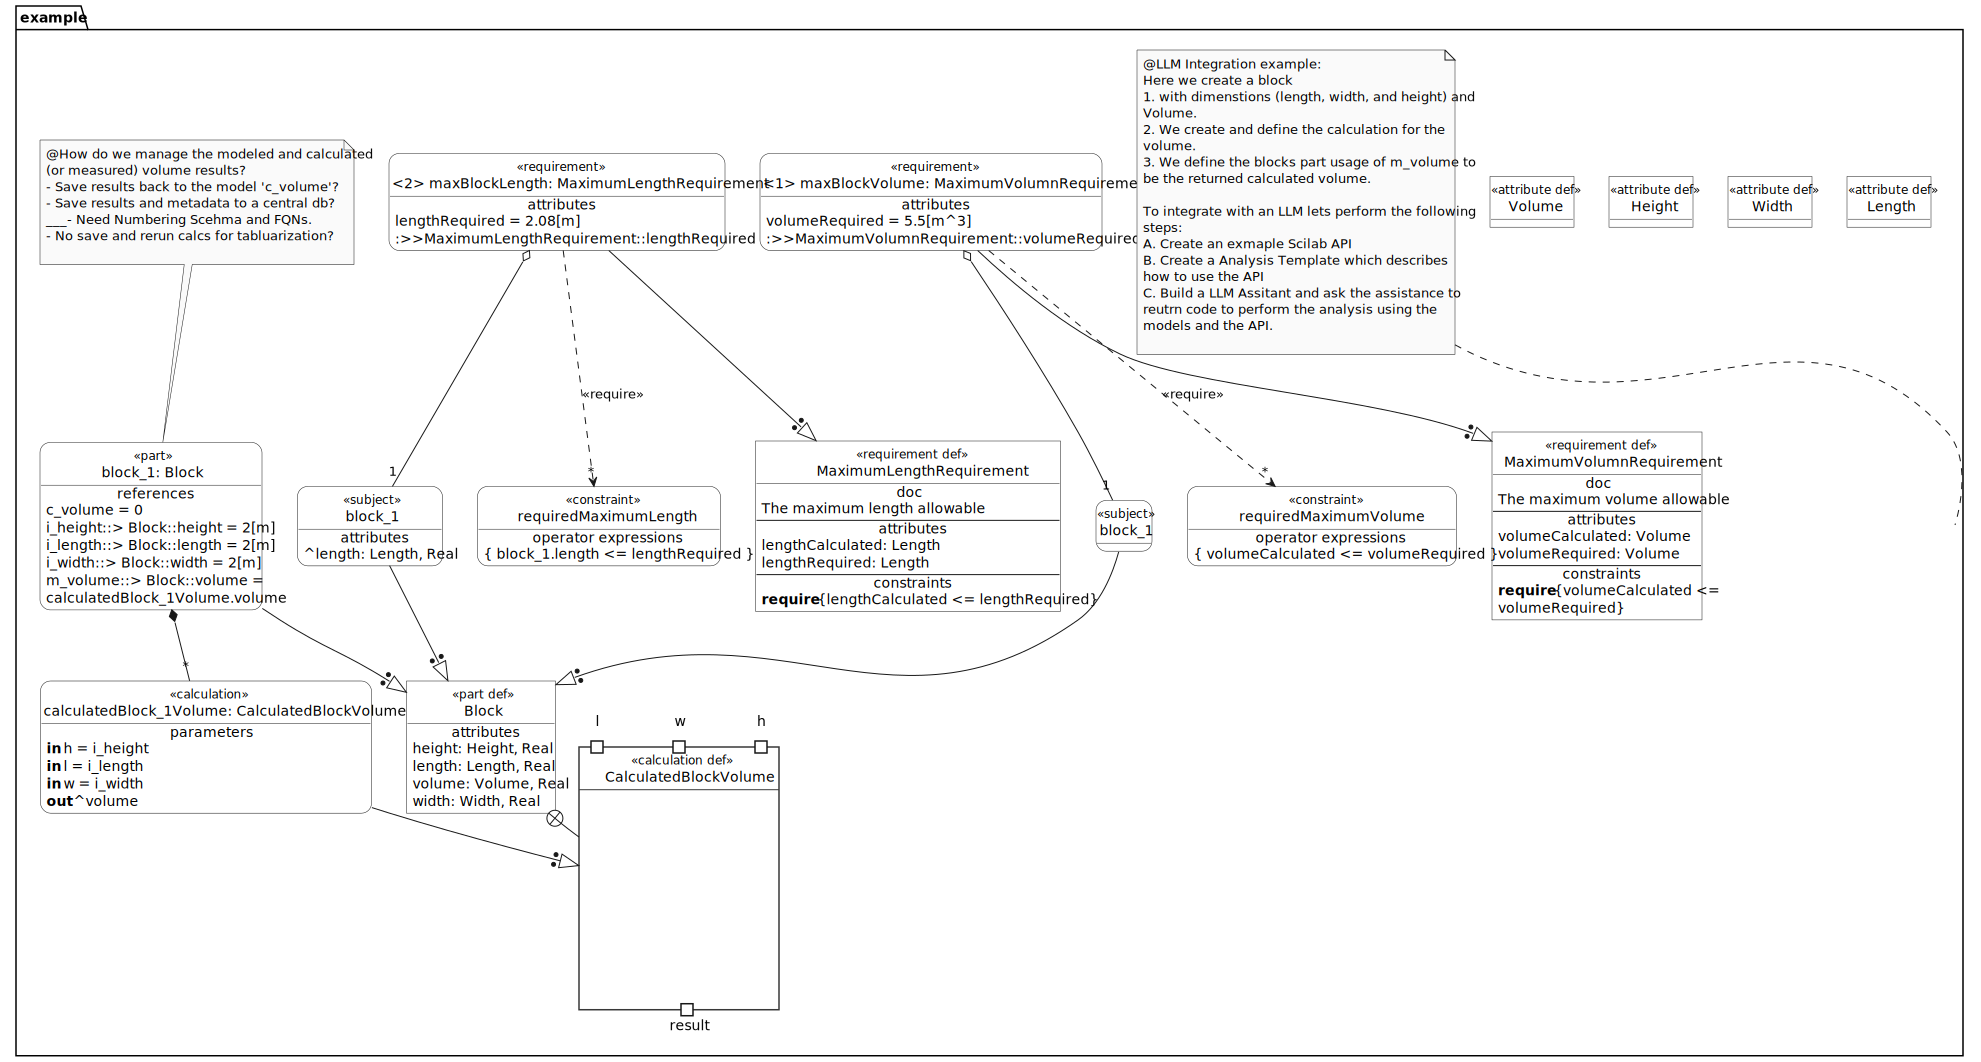

In [6]:
%viz example